In [1]:
from alamopy import almain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/sbugo/surr-vs-imp/surrogate-vs-implicit/svi/Gibbs_reactor/data_gibbs.csv')

## 1. Using Alamo to predict Heat Duty of the Gibbs reactor

In [2]:
df_heat_duty = df[['T_in (K)', 'P_in (Pa)', 'Conversion','Heat Duty (W)']]
df_heat_duty

,T_in (K),P_in (Pa),Conversion,Heat Duty (W)
0,631.812692,8.202667e+05,0.851694,1.931845e+07
1,536.503975,8.859611e+05,0.889879,2.163057e+07
2,632.248976,1.073849e+06,0.604110,1.395270e+07
3,673.029787,1.134747e+06,0.589302,1.316557e+07
4,669.208746,1.051953e+06,0.832611,1.873776e+07
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,1.322717e+07
495,508.648937,8.757323e+05,0.863533,2.125211e+07
496,505.461885,1.141009e+06,0.740437,1.871702e+07
497,645.546447,9.694365e+05,0.915676,2.114173e+07


In [3]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['Heat Duty (W)']
data_in = df_heat_duty[inputs]
data_out = df_heat_duty[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

C:\Users\sbugo\AppData\Local\Temp\ipykernel_29776\2899453595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heat_duty['Predicted Heat Duty'] = result['out']['Z1']['model_fun'](df_heat_duty['T_in (K)'], df_heat_duty['P_in (Pa)'], df_heat_duty['Conversion'])


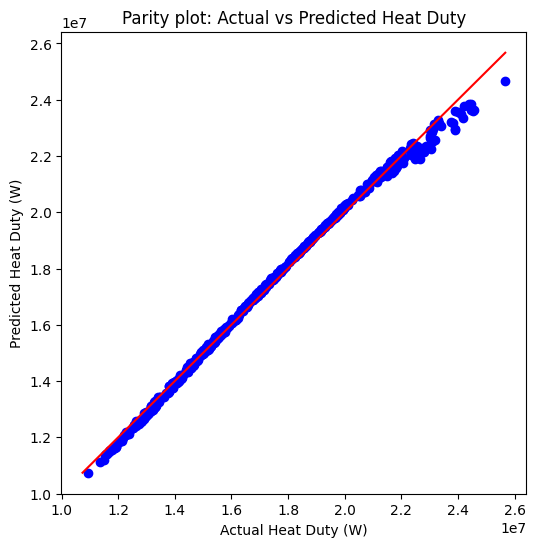

In [4]:
df_heat_duty['Predicted Heat Duty'] = result['out']['Z1']['model_fun'](df_heat_duty['T_in (K)'], df_heat_duty['P_in (Pa)'], df_heat_duty['Conversion'])

min_val = min(df_heat_duty['Heat Duty (W)'].min(), df_heat_duty['Predicted Heat Duty'].min())
max_val = max(df_heat_duty['Heat Duty (W)'].max(), df_heat_duty['Predicted Heat Duty'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_heat_duty['Heat Duty (W)'], df_heat_duty['Predicted Heat Duty'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual Heat Duty (W)')
plt.ylabel('Predicted Heat Duty (W)')
plt.title('Parity plot: Actual vs Predicted Heat Duty')
plt.show()	

## 2. Using Alamo to predict Outlet Temperature of the Gibbs reactor

In [5]:
df_Tout = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'T_out (K)']]
df_Tout

,T_in (K),P_in (Pa),Conversion,T_out (K)
0,631.812692,8.202667e+05,0.851694,1044.289680
1,536.503975,8.859611e+05,0.889879,1070.726663
2,632.248976,1.073849e+06,0.604110,970.197524
3,673.029787,1.134747e+06,0.589302,968.877986
4,669.208746,1.051953e+06,0.832611,1055.923406
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,932.848399
495,508.648937,8.757323e+05,0.863533,1055.475777
496,505.461885,1.141009e+06,0.740437,1024.579931
497,645.546447,9.694365e+05,0.915676,1095.286438


In [6]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['T_out (K)']
data_in = df_Tout[inputs]
data_out = df_Tout[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

C:\Users\sbugo\AppData\Local\Temp\ipykernel_29776\3185182845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tout['Predicted Outlet Temperature'] = result['out']['Z1']['model_fun'](df_Tout['T_in (K)'], df_Tout['P_in (Pa)'], df_Tout['Conversion'])


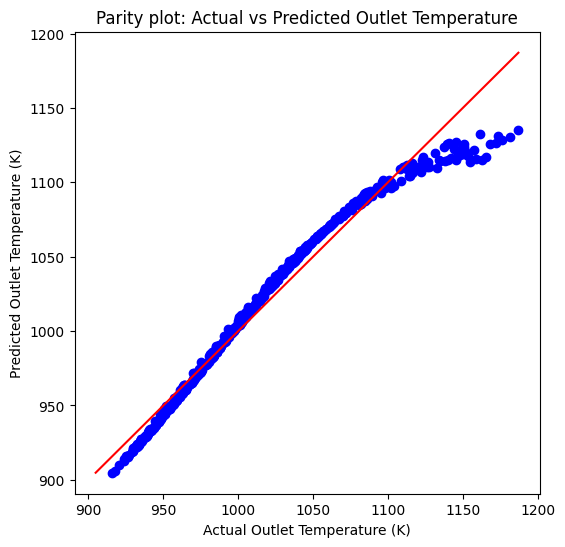

In [7]:
df_Tout['Predicted Outlet Temperature'] = result['out']['Z1']['model_fun'](df_Tout['T_in (K)'], df_Tout['P_in (Pa)'], df_Tout['Conversion'])

min_val = min(df_Tout['T_out (K)'].min(), df_Tout['Predicted Outlet Temperature'].min())
max_val = max(df_Tout['T_out (K)'].max(), df_Tout['Predicted Outlet Temperature'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_Tout['T_out (K)'], df_Tout['Predicted Outlet Temperature'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual Outlet Temperature (K)')
plt.ylabel('Predicted Outlet Temperature (K)')
plt.title('Parity plot: Actual vs Predicted Outlet Temperature')
plt.show()	

## 3. Using Alamo to predict Outlet Molar Flow Rate of the Gibbs reactor

In [8]:
df_Fout = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'F_out (mol/s)']]
df_Fout

,T_in (K),P_in (Pa),Conversion,F_out (mol/s)
0,631.812692,8.202667e+05,0.851694,436.763395
1,536.503975,8.859611e+05,0.889879,442.491108
2,632.248976,1.073849e+06,0.604110,399.625806
3,673.029787,1.134747e+06,0.589302,397.404618
4,669.208746,1.051953e+06,0.832611,433.900935
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,384.341300
495,508.648937,8.757323e+05,0.863533,438.539215
496,505.461885,1.141009e+06,0.740437,420.074782
497,645.546447,9.694365e+05,0.915676,446.360609


In [9]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['F_out (mol/s)']
data_in = df_Fout[inputs]
data_out = df_Fout[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

C:\Users\sbugo\AppData\Local\Temp\ipykernel_29776\2242448603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fout['Predicted Outlet Molar Flow Rate'] = result['out']['Z1']['model_fun'](df_Fout['T_in (K)'], df_Fout['P_in (Pa)'], df_Fout['Conversion'])


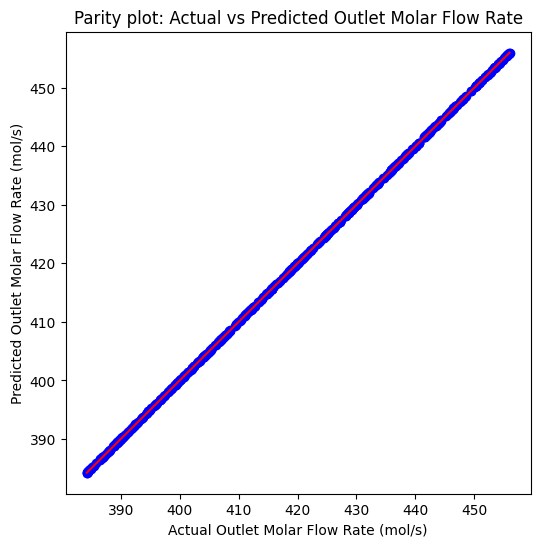

In [10]:
df_Fout['Predicted Outlet Molar Flow Rate'] = result['out']['Z1']['model_fun'](df_Fout['T_in (K)'], df_Fout['P_in (Pa)'], df_Fout['Conversion'])

min_val = min(df_Fout['F_out (mol/s)'].min(), df_Fout['Predicted Outlet Molar Flow Rate'].min())
max_val = max(df_Fout['F_out (mol/s)'].max(), df_Fout['Predicted Outlet Molar Flow Rate'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_Fout['F_out (mol/s)'], df_Fout['Predicted Outlet Molar Flow Rate'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual Outlet Molar Flow Rate (mol/s)')
plt.ylabel('Predicted Outlet Molar Flow Rate (mol/s)')
plt.title('Parity plot: Actual vs Predicted Outlet Molar Flow Rate')
plt.show()	